# Titanic Exercise
This is code to build a model to identify whether someone survived the titanic based on criteria such as age, sex etc.

In [97]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
train_data = pd.read_csv('train.csv')

In [99]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
test_data = pd.read_csv('test.csv')

In [101]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
#We use Seaborn to initially check for any missing data:

<AxesSubplot:>

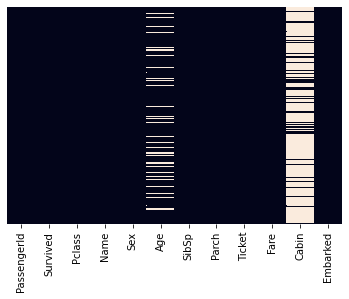

In [103]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [104]:
#Clearly there are issues with both Age and Cabin, will drop Cabin, 
#the data for Age may be good enough that we can fill in.

In [105]:
#Dropping the cabin data:

In [106]:
train_data.drop('Cabin',axis=1,inplace=True)

In [107]:
#We now check the average age by class in order to clean the age data

In [108]:
plt.figure(figsize=(1W2, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

SyntaxError: invalid syntax (<ipython-input-108-55da1657e7a5>, line 1)

In [109]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [110]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [111]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [112]:
#We still have to deal with the cases where it is not known if the passengers have embarked or not. Since this is only two cases, we can just drop them.

In [113]:
train_data.dropna(inplace=True)

In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


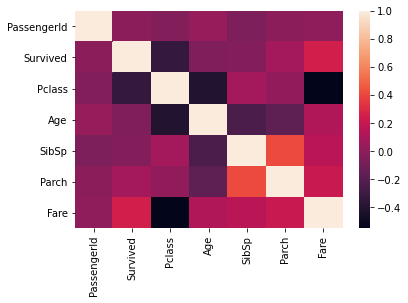

In [115]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()

In [116]:
#we note that SibSp and Parch are closely correlated, so we can combine these two columns to reduce the overall dimension.

In [117]:
#Simple Data Analysis:

In [118]:
((train_data.groupby(['Sex','Survived']).Survived.count() * 100) / train_data.groupby('Sex').Survived.count())


Sex     Survived
female  0           25.961538
        1           74.038462
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [119]:
(train_data.groupby(['Pclass','Survived']).Survived.count() * 100) / train_data.groupby('Pclass').Survived.count()


Pclass  Survived
1       0           37.383178
        1           62.616822
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [120]:
(train_data.groupby(['Embarked','Survived']).Survived.count() * 100) / train_data.groupby('Embarked').Survived.count()


Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

In [121]:
train_data.groupby(by=['Survived']).mean()["Age"]
# this show that average age of people who survived was around 28 years old

Survived
0    29.560109
1    28.146088
Name: Age, dtype: float64

In [122]:
combined_data = [train_data, test_data]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
********************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
********************


In [123]:
#at this point we drop the Cabin column from the test data
test_data.drop('Cabin', axis = 1, inplace = True)

In [124]:
combined_data = [train_data, test_data]
for data in combined_data:
    print(data.isnull().sum())
    print('*' * 20)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
********************
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
********************


In [125]:
#We convert our categorical features to numerical ones in preparation.

In [126]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
train_data.Sex = train_data.Sex.apply(change_gender)
test_data.Sex = test_data.Sex.apply(change_gender)


In [127]:
change = {'S':1,'C':2,'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)

In [128]:
#We combine the SibSp and Parch columns into one called "alone"

In [129]:
train_data['Alone'] = train_data.SibSp + train_data.Parch
test_data['Alone'] = test_data.SibSp + test_data.Parch

train_data.Alone = train_data.Alone.apply(lambda x: 1 if x == 0 else 0)
test_data.Alone = test_data.Alone.apply(lambda x: 1 if x == 0 else 0)

In [130]:
# we now droup SibSp and Parch column for both training and testing data
train_data.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp','Parch'], axis = 1, inplace = True )

In [131]:
# we now create a Title feature to get some usage of the name variable

In [132]:
for data in combined_data:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand = False)
    data.drop('Name', axis = 1, inplace = True)

In [133]:
train_data.Title.value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Jonkheer      1
Sir           1
Mme           1
Ms            1
Countess      1
Don           1
Capt          1
Name: Title, dtype: int64

In [134]:
test_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [135]:
#we combine the rarest titles into 'Rare'

In [136]:
least_occuring = [ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Dona',
       'Jonkheer']
for data in combined_data:
    data.Title = data.Title.replace(least_occuring, 'Rare')

In [137]:
# we enumerate the titles

In [138]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combined_data:
    data['Title'] = data['Title'].map(title_mapping)

In [139]:
columns_to_drop = ['PassengerId','Ticket']
train_data.drop(columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns_to_drop[1], axis = 1, inplace = True)

In [140]:
for dataset in combined_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [141]:
for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 2
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 3
    data.loc[(data['Fare'] >= 100),'Fare'] = 4

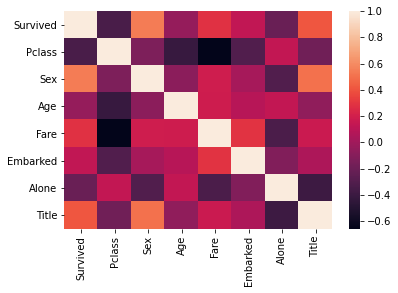

In [142]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()

# We have cleaned our data, and will use tensorflow to generate a model to decide the survival of specific passengers.

In [143]:
#Setting up tensorflow:

In [144]:
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,1.0,1.0,1,0,1
1,1,1,1,2.0,3.0,2,0,3
2,1,3,1,1.0,1.0,1,1,2
3,1,1,1,2.0,3.0,1,0,3
4,0,3,0,2.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,1.0,1,1,5
887,1,1,1,1.0,2.0,1,1,2
888,0,3,1,1.0,1.0,1,0,2
889,1,1,0,1.0,2.0,2,1,1


In [145]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis = 1)
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)

shape of X_train (889, 7)
Shape of Y_train (889,)
Shape of x_test (418, 7)


In [146]:
import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [147]:
model = Sequential()
model.add(Dense(units = 32, input_shape = (7,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))

In [148]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                2048      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8192      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8192      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

In [149]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,3,0,1.0,1.0,1,0,1
1,1,1,2.0,3.0,2,0,3
2,3,1,1.0,1.0,1,1,2
3,1,1,2.0,3.0,1,0,3
4,3,0,2.0,1.0,1,1,1


In [150]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 50)

Epoch 1/50
28/28 - 1s - loss: 0.5936 - acc: 0.6817
Epoch 2/50
28/28 - 0s - loss: 0.5223 - acc: 0.7784
Epoch 3/50
28/28 - 0s - loss: 0.4885 - acc: 0.7773
Epoch 4/50
28/28 - 0s - loss: 0.4348 - acc: 0.8110
Epoch 5/50
28/28 - 0s - loss: 0.4364 - acc: 0.8155
Epoch 6/50
28/28 - 0s - loss: 0.4250 - acc: 0.8076
Epoch 7/50
28/28 - 0s - loss: 0.4160 - acc: 0.8256
Epoch 8/50
28/28 - 0s - loss: 0.4309 - acc: 0.8178
Epoch 9/50
28/28 - 0s - loss: 0.4311 - acc: 0.8009
Epoch 10/50
28/28 - 0s - loss: 0.4176 - acc: 0.8268
Epoch 11/50
28/28 - 0s - loss: 0.4070 - acc: 0.8223
Epoch 12/50
28/28 - 0s - loss: 0.4009 - acc: 0.8234
Epoch 13/50
28/28 - 0s - loss: 0.4118 - acc: 0.8189
Epoch 14/50
28/28 - 0s - loss: 0.3921 - acc: 0.8301
Epoch 15/50
28/28 - 0s - loss: 0.4023 - acc: 0.8245
Epoch 16/50
28/28 - 0s - loss: 0.3878 - acc: 0.8380
Epoch 17/50
28/28 - 0s - loss: 0.3997 - acc: 0.8358
Epoch 18/50
28/28 - 0s - loss: 0.3903 - acc: 0.8369
Epoch 19/50
28/28 - 0s - loss: 0.3972 - acc: 0.8369
Epoch 20/50
28/28 - 0

In [151]:
predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]


In [152]:
submit = pd.DataFrame({"PassengerId":test_data.PassengerId, 'Survived':predict})
submit.to_csv("final_submission.csv",index = False)

In [153]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

Precision :  87.46
Accuracy :  85.26
Recall :  71.76
F1 score :  78.84
AUC :  82.69


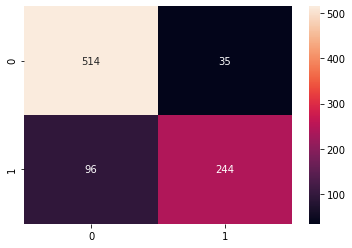

In [154]:
# plotting the confusion matrix in heatmap
matrix = metrics.confusion_matrix(Y_train, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()